In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [46]:
df_londonq1 = pd.read_excel('nhs-london-2020.xlsx', header =1, sheet_name = 'Q1 2020')
df_londonq1.drop(axis=0, index=[0,12,21,23], inplace =True)

df_londonq2 = pd.read_excel('nhs-london-2020.xlsx', header =1, sheet_name = 'Q2 2020')
df_londonq2.drop(axis=0, index=[0,12,21,23], inplace =True)

df_londonq3 = pd.read_excel('nhs-london-2020.xlsx', header =1, sheet_name = 'Q3 2020')
df_londonq3.drop(axis=0, index=[0,12,21,23], inplace =True)

df_londonq4 = pd.read_excel('nhs-london-2020.xlsx', header =1, sheet_name = 'Q4 2020')
df_londonq4.drop(axis=0, index=[0,12,21,23], inplace =True)

In [47]:
df_londonq1.rename(columns ={'Indicator value': 'Q1_indicator_val',
                            'Indicator* - Please see the Metadata tab for further details on the indicators': 'Indicator'}, inplace = True)
df_londonq2.rename(columns ={'Indicator value': 'Q2_indicator_val',
                            'Indicator* - Please see the Metadata tab for further details on the indicators': 'Indicator'}, inplace = True)
df_londonq3.rename(columns ={'Indicator value': 'Q3_indicator_val',
                            'Indicator* - Please see the Metadata tab for further details on the indicators': 'Indicator'}, inplace = True)
df_londonq4.rename(columns ={'Indicator value': 'Q4_indicator_val',
                            'Indicator* - Please see the Metadata tab for further details on the indicators': 'Indicator'}, inplace = True)

In [48]:
df_london = df_londonq1.drop(['Reporting period', 'Better is…'], axis = 1)
df_london['Reporting_period'] = '2020/2021'

In [49]:
df_london =df_london[['Code', 'Indicator', 'Reporting_period', 'Q1_indicator_val']]
df_london = pd.concat([df_london, df_londonq2.iloc[:,3:4], df_londonq3.iloc[:,3:4],df_londonq4.iloc[:,3:5]], axis =1)

In [50]:
df_london

,Code,Indicator,Reporting_period,Q1_indicator_val,Q2_indicator_val,Q3_indicator_val,Q4_indicator_val,Better is…
1,CYP(i.a),No of CYP accessing support by NHS funded comm...,2020/2021,NaN,NaN,80535,80825,▲
2,CYP(i.b),No of CYP accessing support by NHS funded comm...,2020/2021,NaN,NaN,60725,59860,▲
3,CYP(i.c),% of CYP accessing support by NHS funded commu...,2020/2021,NaN,NaN,0.369,0.364,▲
4,CYP(ii.a),% of CYP with eating disorders seen within 1 w...,2020/2021,0.912,0.889,0.711,0.733,NaN
5,CYP(ii.b),% of CYP with eating disorders seen within 4 w...,2020/2021,0.921,0.883,0.778,0.675,NaN
6,CYP(iii.a),Number of bed days for CYP under 18 in Child ...,2020/2021,13461,14442,14640,14053,NaN
7,CYP(iii.b),Number of admissions of CYP under 18 in Child ...,2020/2021,135,156,143,125,NaN
8,CYP(iv.a),Bed days of CYP under 18 in adult in-patient w...,2020/2021,NaN,NaN,135,610,NaN
9,CYP(iv.b),Number of CYP under 18 in adult in-patient wards,2020/2021,NaN,NaN,15,30,NaN
10,CYP(v),CYP Mental Health CCG spend - excluding learni...,2020/2021,161.2m,161.2m,161.2m,£164.1m,NaN


In [51]:
# Maunally removing the letters/special char
df_london.Q1_indicator_val.replace({'161.2m': '161.2', '8.7m': '8.7', '134m': '134'}, inplace = True)
df_london.Q2_indicator_val.replace({'161.2m': '161.2', '8.7m': '8.7', '134.8m': '134.8'}, inplace = True)
df_london.Q3_indicator_val.replace({'161.2m': '161.2', '8.7m': '8.7', '134.8m': '134.8'}, inplace = True)
df_london.Q4_indicator_val.replace({'£164.1m': '164.1', '£8.1m': '8.1', '£134.6m': '134.6'}, inplace = True)

In [52]:
# Convert indicator values to float
convert_dict = {'Q1_indicator_val': float,
                'Q2_indicator_val': float,
                'Q3_indicator_val': float,
                'Q4_indicator_val': float
               }
df_london = df_london.astype(convert_dict)
df_london = df_london.round({"Q1_indicator_val":2, "Q2_indicator_val":2, "Q3_indicator_val":2, "Q4_indicator_val":2 }) 

In [53]:
df_london.iloc[:, 3:7]

,Q1_indicator_val,Q2_indicator_val,Q3_indicator_val,Q4_indicator_val
1,NaN,NaN,80535.00,80825.00
2,NaN,NaN,60725.00,59860.00
3,NaN,NaN,0.37,0.36
4,0.91,0.89,0.71,0.73
5,0.92,0.88,0.78,0.68
6,13461.00,14442.00,14640.00,14053.00
7,135.00,156.00,143.00,125.00
8,NaN,NaN,135.00,610.00
9,NaN,NaN,15.00,30.00
10,161.20,161.20,161.20,164.10


In [54]:
from sklearn.impute import SimpleImputer

#mean, median, most_frequent
imr = SimpleImputer(missing_values=np.nan, strategy='median') 

#fit method will calculate the required parameters (meadian) and store it in the impute object
imr = imr.fit(df_london.iloc[:, 3:7].values)
print(imr)

#transform will actually do the work of replacement of nan with mean.
imputed_data = imr.transform(df_london.iloc[:, 3:7].values)

SimpleImputer(strategy='median')


In [55]:
df2 = pd.DataFrame.from_records(imputed_data)
df2.columns = df_london.iloc[:, 3:7].columns
df2

,Q1_indicator_val,Q2_indicator_val,Q3_indicator_val,Q4_indicator_val
0,0.93,0.93,80535.000,80825.00
1,0.93,0.93,60725.000,59860.00
2,0.93,0.93,0.370,0.36
3,0.91,0.89,0.710,0.73
4,0.92,0.88,0.780,0.68
5,13461.00,14442.00,14640.000,14053.00
6,135.00,156.00,143.000,125.00
7,0.93,0.93,135.000,610.00
8,0.93,0.93,15.000,30.00
9,161.20,161.20,161.200,164.10


In [56]:
# imputed data statistical description
df2.describe()

,Q1_indicator_val,Q2_indicator_val,Q3_indicator_val,Q4_indicator_val
count,23.000000,23.000000,23.000000,23.000000
mean,606.960435,651.276522,6807.698478,6777.339130
std,2802.506280,3006.711774,20584.524682,20513.166468
min,0.040000,0.040000,0.040000,0.040000
25%,0.705000,0.690000,0.480000,0.510000
50%,0.930000,0.930000,4.845000,1.000000
75%,12.300000,12.550000,134.900000,129.800000
max,13461.000000,14442.000000,80535.000000,80825.000000


In [57]:
# dataframe with null values
df_london.describe()

,Q1_indicator_val,Q2_indicator_val,Q3_indicator_val,Q4_indicator_val
count,17.000000,17.000000,22.000000,23.000000
mean,820.853529,880.810588,7116.919091,6777.339130
std,3257.755364,3495.117859,21014.185733,20513.166468
min,0.040000,0.040000,0.040000,0.040000
25%,0.480000,0.480000,0.475000,0.510000
50%,0.930000,0.930000,4.845000,1.000000
75%,33.300000,49.400000,134.950000,129.800000
max,13461.000000,14442.000000,80535.000000,80825.000000


# GRAPHHH

In [58]:
df_viz = df_london.copy()
df_viz.reset_index(drop = True, inplace = True)

In [59]:
df_viz.head()

,Code,Indicator,Reporting_period,Q1_indicator_val,Q2_indicator_val,Q3_indicator_val,Q4_indicator_val,Better is…
0,CYP(i.a),No of CYP accessing support by NHS funded comm...,2020/2021,NaN,NaN,80535.00,80825.00,▲
1,CYP(i.b),No of CYP accessing support by NHS funded comm...,2020/2021,NaN,NaN,60725.00,59860.00,▲
2,CYP(i.c),% of CYP accessing support by NHS funded commu...,2020/2021,NaN,NaN,0.37,0.36,▲
3,CYP(ii.a),% of CYP with eating disorders seen within 1 w...,2020/2021,0.91,0.89,0.71,0.73,NaN
4,CYP(ii.b),% of CYP with eating disorders seen within 4 w...,2020/2021,0.92,0.88,0.78,0.68,NaN


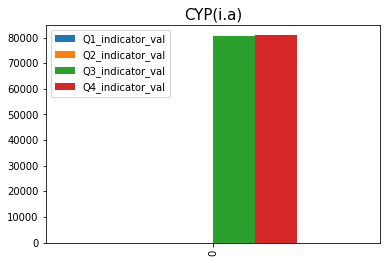

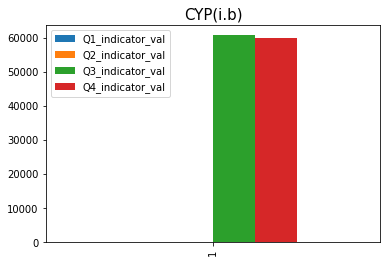

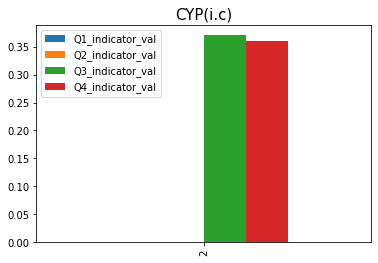

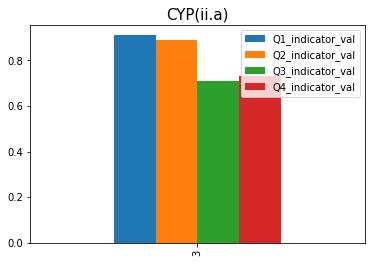

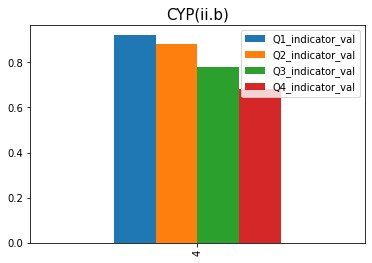

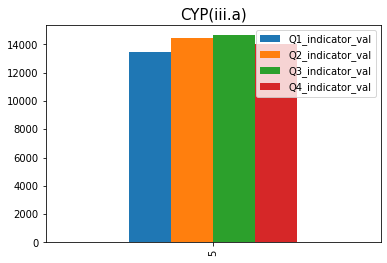

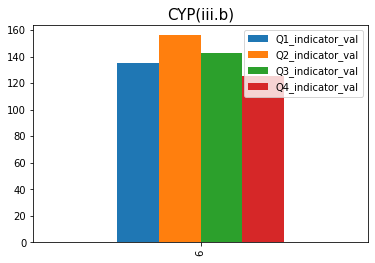

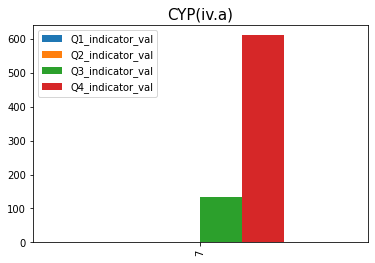

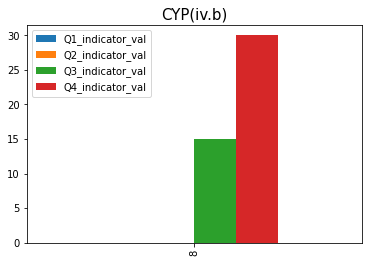

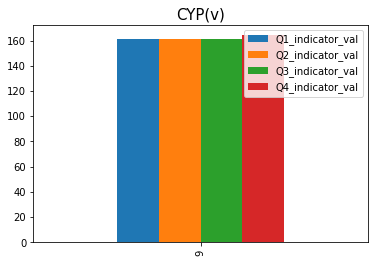

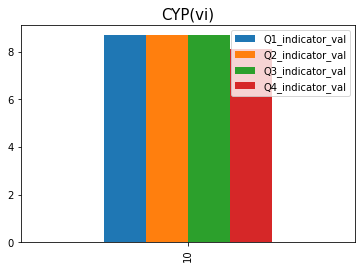

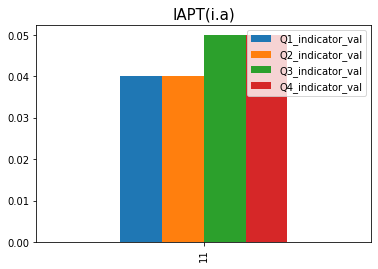

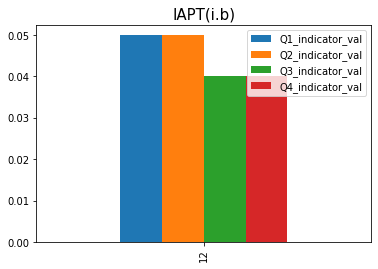

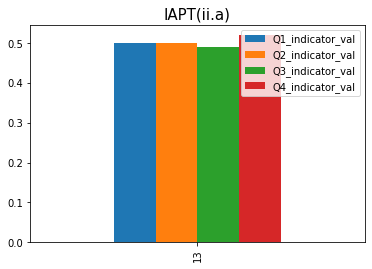

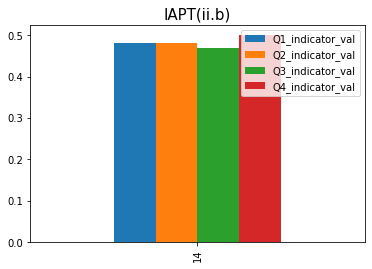

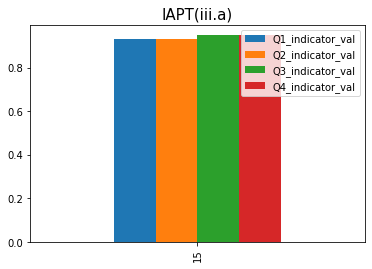

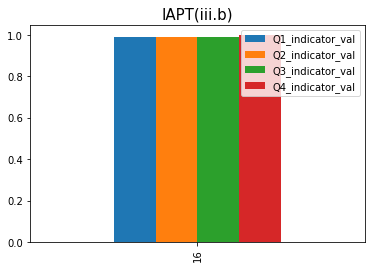

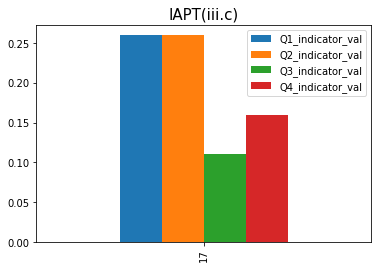

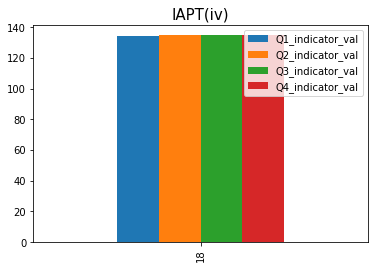

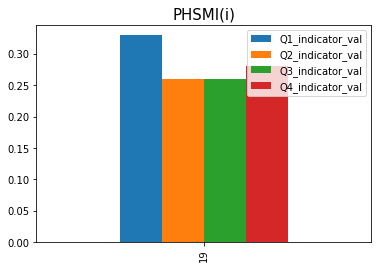

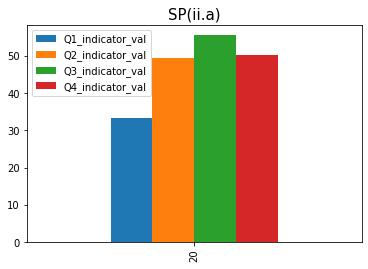

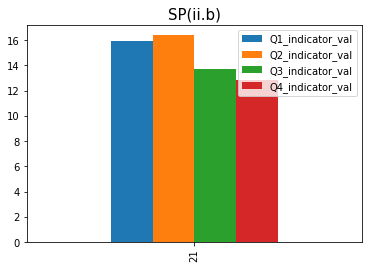

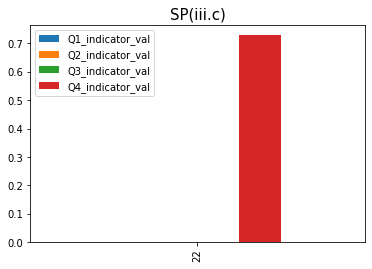

In [60]:
Code =list(df_viz['Code'].values)
for i in df_viz.index:
    render_df = df_viz.iloc[i:i+1,3:7]
    fig, ax = plt.subplots(1,1)
    render_df.plot(kind='bar', ax=ax)
    plt.title(Code[i], fontdict = {'fontsize':15})
    ax.legend()
    plt.show()